In [6]:
from matplotlib import pyplot as plt
from scipy import stats
import numpy as np
import pandas as pd
import seaborn as sns
from scipy.stats import linregress

In [7]:
nat_disasters_df = pd.read_csv("../clean.csv")

In [8]:
nat_disasters_df.head()

,Id,OwnerCity,OwnerState,PropertyLocationStreet1,PropertyCity,PropertyZip,StateParcelId,ParcelSize,ValueofHome,YearBuilt,...,FireID,DistancetoFireDepartment,DistancetoSinkhole,SinkholeLatitude,SinkholeLongitude,LocationWindSpeed,WindborneDebrisRegion,Terrain,FloodZone,FloodZoneRiskLevel
0,12009f31026acc440,PINEHURST,NC,5833 NEWBURY CIR,MELBOURNE,32940,C15-000-035-4368-3,10890.0,360350.0,2001.0,...,NaN,1.67,19.32,28.46383,-80.79177,120.0,True,B,X:100,NaN
1,120112bfc77a87376,STAFFORD,VA,12723 SW 49 CT,MIRAMAR,33027,C16-000-107-5040-4,2328.0,228680.0,2003.0,...,645.0,2.37,5.11,25.98582,-80.23586,140.0,True,HVHZ,X:100,NaN
2,12081776a04b281f4,RICHMOND,VA,6470 SEAGULL DR UNIT 307,BRADENTON,34210,C51-000-535-8660-8,44.0,135000.0,1980.0,...,NaN,0.96,1.93,27.41706,-82.56742,130.0,True,C,A:100,NaN
3,12103fabafeea9fb7,ARLINGTON,VA,1012 NORTH SHORE DR NE # 12,SAINT PETERSBURG,33701,C62-000-778-7949-2,NaN,87660.0,1959.0,...,855.0,1.08,1.00,27.77333,-82.64000,123.0,True,C,"X500:40, A:30, X:30",NaN
4,120213b0f5f17e3d1,ROCK HILL,SC,5550 HERON POINT DR,NAPLES,34108,C21-000-189-4508-9,NaN,663090.0,1991.0,...,50.0,1.37,11.43,26.27444,-81.63916,131.0,True,C,A:100,NaN


In [10]:
new_df = nat_disasters_df[
            ['OwnerCity', 'OwnerState', 'ValueofHome', 'DistancetoSinkhole','LocationWindSpeed', 
             'WindborneDebrisRegion','Terrain', 'FloodZone']
]
new_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 228 entries, 0 to 227
Data columns (total 8 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   OwnerCity              228 non-null    object 
 1   OwnerState             228 non-null    object 
 2   ValueofHome            228 non-null    float64
 3   DistancetoSinkhole     227 non-null    float64
 4   LocationWindSpeed      227 non-null    float64
 5   WindborneDebrisRegion  227 non-null    object 
 6   Terrain                227 non-null    object 
 7   FloodZone              227 non-null    object 
dtypes: float64(3), object(5)
memory usage: 14.4+ KB


In [ ]:
sinkhole_df = nat_disasters_df[
            ['OwnerState','DistancetoSinkhole']
]
sinkhole_df.head()

In [ ]:
sinkhole_df.describe()

In [ ]:
nc_sinkhole_df = sinkhole_df.loc[(sinkhole_df["OwnerState"] == "NC"), :]
nc_sinkhole_df
quartiles = nc_sinkhole_df['DistancetoSinkhole'].quantile([.25,.5,.75])
lowerq = quartiles[.25]
upperq = quartiles[.75]
iqr = upperq-lowerq

print(f"The lower quartile of the distance to sinkhole is: {round(lowerq,2)}")
print(f"The upper quartile of the distance to sinkhole is: {round(upperq,2)}")
print(f"The interquartile range of the distance to sinkhole is: {round(iqr,2)}")
print(f"The median of the distance to sinkhole is: {quartiles[0.5]} ")

lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)
print(f"Values below {round(lower_bound,2)} could be outliers.")
print(f"Values above {round(upper_bound,2)} could be outliers.")


In [ ]:
va_sinkhole_df = sinkhole_df.loc[(sinkhole_df["OwnerState"] == "VA"), :]
va_sinkhole_df
quartiles = va_sinkhole_df['DistancetoSinkhole'].quantile([.25,.5,.75])
lowerq = quartiles[.25]
upperq = quartiles[.75]
iqr = upperq-lowerq

print(f"The lower quartile of the distance to sinkhole is: {round(lowerq,2)}")
print(f"The upper quartile of the distance to sinkhole is: {round(upperq,2)}")
print(f"The interquartile range of the distance to sinkhole is: {round(iqr,2)}")
print(f"The median of the distance to sinkhole is: {quartiles[0.5]} ")

lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)
print(f"Values below {round(lower_bound,2)} could be outliers.")
print(f"Values above {round(upper_bound,2)} could be outliers.")


In [ ]:
sc_sinkhole_df = sinkhole_df.loc[(sinkhole_df["OwnerState"] == "SC"), :]
sc_sinkhole_df
quartiles = sc_sinkhole_df['DistancetoSinkhole'].quantile([.25,.5,.75])
lowerq = quartiles[.25]
upperq = quartiles[.75]
iqr = upperq-lowerq

print(f"The lower quartile of the distance to sinkhole is: {round(lowerq,2)}")
print(f"The upper quartile of the distance to sinkhole is: {round(upperq,2)}")
print(f"The interquartile range of the distance to sinkhole is: {round(iqr,2)}")
print(f"The median of the distance to sinkhole is: {quartiles[0.5]} ")

lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)
print(f"Values below {round(lower_bound,2)} could be outliers.")
print(f"Values above {round(upper_bound,2)} could be outliers.")

In [ ]:
sns.boxplot(x='OwnerState', y='DistancetoSinkhole', data=sinkhole_df)
plt.xlabel('State')
plt.ylabel("Distance")
plt.title('Distance to Sinkhole')

plt.savefig("Images/SinkholeComparison.png")
plt.show()

In [ ]:
windspeed_df = nat_disasters_df[
            ['OwnerState','LocationWindSpeed']
]
windspeed_df.head()

In [ ]:
windspeed_df.describe()

In [ ]:
sc_windspeed_df = windspeed_df.loc[windspeed_df["OwnerState"] == "SC", :]
sc_windspeed_df.head()

nc_windspeed_df = windspeed_df.loc[windspeed_df["OwnerState"] == "NC", :]
nc_windspeed_df.head()

va_windspeed_df = windspeed_df.loc[windspeed_df["OwnerState"] == "VA", :]
va_windspeed_df.head()

In [ ]:
sc_windspeed_count = sc_windspeed_df.groupby(['LocationWindSpeed']).count()

sc_plot_windspeed_count = sc_windspeed_count.plot.bar(color='red', alpha=0.8, align="center")
plt.xlabel('Windspeed')
plt.ylabel('Windspeed Count')
plt.title('SC Windspeed')

plt.savefig("Images/SC Windspeed.png")
plt.show()

nc_windspeed_count = nc_windspeed_df.groupby(['LocationWindSpeed']).count()

plot_windspeed_count = nc_windspeed_count.plot.bar(color='blue', alpha=0.5, align="center")
plt.xlabel('Windspeed')
plt.ylabel('Windspeed Count')
plt.title('NC Windspeed')

plt.savefig("Images/NC Windspeed.png")
plt.show()

va_windspeed_count = va_windspeed_df.groupby(['LocationWindSpeed']).count()

va_plot_windspeed_count = va_windspeed_count.plot.bar(color='orange', alpha=0.7, align="center")
plt.xlabel('Windspeed')
plt.ylabel('Windspeed Count')
plt.title('VA Windspeed')

plt.savefig("Images/VA Windspeed.png")
plt.show()


In [ ]:
windborne_debris_df = nat_disasters_df[
            ['OwnerState', 'WindborneDebrisRegion']
]
windborne_debris_df.head()

In [ ]:
sc_windborne_debris_df = windborne_debris_df.loc[(windborne_debris_df["OwnerState"] == "SC"), :]
sc_windborne_debris_df.head()

In [ ]:
sc_windborne_count = sc_windborne_debris_df.value_counts('WindborneDebrisRegion')
sc_windborne_count

In [ ]:
nc_windborne_debris_df = windborne_debris_df.loc[(windborne_debris_df["OwnerState"] == "NC"), :]
nc_windborne_debris_df.head()

In [ ]:
nc_windborne_count = nc_windborne_debris_df.value_counts('WindborneDebrisRegion')
nc_windborne_count

In [ ]:
va_windborne_debris_df = windborne_debris_df.loc[(windborne_debris_df["OwnerState"] == "VA"), :]
va_windborne_debris_df.head()

In [ ]:
va_windborne_count = va_windborne_debris_df.value_counts('WindborneDebrisRegion')
va_windborne_count

In [ ]:
nc_windborne_count.plot.pie(shadow=True, autopct = "%1.1f%%")

plt.title('NC Windborne Debris')
plt.ylabel('State')
plt.savefig("Images/nc_windborne.png")
plt.show()

sc_windborne_count.plot.pie(shadow=True, autopct = "%1.1f%%")

plt.title('SC Windborne Debris')
plt.ylabel('State')
plt.savefig("Images/sc_windborne.png")
plt.show()

va_windborne_count.plot.pie(shadow=True, autopct = "%1.1f%%")

plt.title('VA Windborne Debris')
plt.ylabel('State')
plt.savefig("Images/va_windborne.png")
plt.show()

In [ ]:
terrian_df = nat_disasters_df[['OwnerState','Terrain']]
terrian_df.head()

In [ ]:
va_terrain_df = terrian_df.loc[(terrian_df["OwnerState"] == "VA"), :]
va_terrain_df.head()

nc_terrain_df = terrian_df.loc[(terrian_df["OwnerState"] == "NC"), :]
nc_terrain_df.head()

sc_terrain_df = terrian_df.loc[(terrian_df["OwnerState"] == "SC"), :]
sc_terrain_df.head()

In [ ]:
va_terrain_count = va_terrain_df.value_counts('Terrain')
va_terrain_count

nc_terrain_count = nc_terrain_df.value_counts('Terrain')
nc_terrain_count

sc_terrain_count = sc_terrain_df.value_counts('Terrain')
sc_terrain_count

In [ ]:
va_terrain_count.plot.pie(shadow=True, autopct = "%1.1f%%",)

plt.title('VA Terrain')
plt.ylabel('Terrain')
plt.savefig("Images/va_terrain.png")
plt.show()

nc_terrain_count.plot.pie(shadow=True, autopct = "%1.1f%%")

plt.title('NC Terrain')
plt.ylabel('Terrain')
plt.savefig("Images/nc_terrain.png")
plt.show()

sc_terrain_count.plot.pie(shadow=True, autopct = "%1.1f%%")

plt.title('SC Terrain')
plt.ylabel('Terrain')
plt.savefig("Images/sc_terrain.png")
plt.show()

In [13]:
terrian2_df = nat_disasters_df[['ValueofHome','Terrain']]
terrian2_df.head()

,ValueofHome,Terrain
0,360350.0,B
1,228680.0,HVHZ
2,135000.0,C
3,87660.0,C
4,663090.0,C


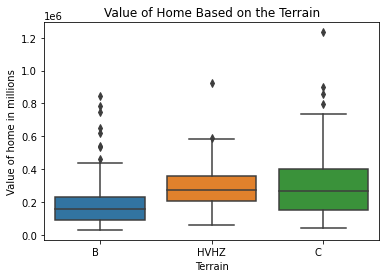

In [18]:
sns.boxplot(x='Terrain', y='ValueofHome', data=terrian2_df)
plt.xlabel('Terrain')
plt.ylabel("Value of home in millions")
plt.title('Value of Home Based on the Terrain')

plt.savefig("Value of Home Based on the Terrain.png")
plt.show()